<a id='top'></a>
# Code for using Parkinson's Pose Estimation Dataset

This notebook describes the dataset accompanying the paper:
'Vision-Based Assessment of Parkinsonism and Levodopa-Induced Dyskinesia with Deep Learning Pose Estimation' - Li, Mestre, Fox, Taati (2017).

The data includes all movement trajectories extracted from the videos of Parkinson's assessments using Convolutional Pose Machines (CPM) (https://arxiv.org/abs/1602.00134), as well as the confidence values from CPM. The dataset also includes ground truth ratings of parkinsonism and dyskinesia severity using the UDysRS, UPDRS, and CAPSIT.

Camera shake has been removed from trajectories as described in the paper. No other preprocessing has been performed.

Place data files in the same folder as this file (data_import_demo.py). 

Files are saved in JSON format, so you'll require a JSON reading package in Python. Python comes with a package called json but we recommend ujson or simplejson (both of which are drop-in replacements for json and included in Anaconda).

### Table of contents:

1. [Trajectories](#Trajectories)
    1. [Communication/Drinking Tasks](#Comm/Drink)
    2. [Leg Agility Task](#legagility)
    3. [Toe Tapping Task](#toetapping)
2. [Ratings](#Ratings)
    1. [UDysRS](#UDysRS)
    2. [UPDRS](#UPDRS)
    3. [CAPSIT](#CAPSIT)
3. [Subject numbers](#Subjects)
4. [Example](#Demo)

In [5]:
try:
    import ujson as json
except ImportError:
    try:
        import simplejson as json
    except ImportError:
        import json

import numpy as np
import matplotlib.pyplot as plt

<a id='Trajectories'></a>
## 1. Trajectories

<a id='Comm/Drink'></a>
### A. Communication/Drinking Tasks

Let's try loading the data from the communication task. The format of the files for the communication and drinking tasks is the same.

In [94]:
trajectory_file = 'Communication_all_export.txt'

with open(trajectory_file, 'r') as infile:
    comm_dict = json.load(infile)

len(comm_dict.keys())

387

When reading in from the JSON file, the data is formatted as a dictionary. The dictionary has 387 keys. These represent separate trajectories - let's look at the format of the keys.

In [95]:
comm_dict.keys()[:20]

[u'26-1',
 u'22-3',
 u'22-2',
 u'25-1',
 u'25-3',
 u'51-1',
 u'51-3',
 u'51-2',
 u'52-3',
 u'248-1',
 u'248-3',
 u'20-2 (occl)',
 u'79-1',
 u'74-2',
 u'74-3',
 u'74-1',
 u'289-1',
 u'240-1',
 u'240-3',
 u'21-1']

Each key is a string with the format 'trial number - segment number (noise type)'. Most trials have 3 parts. Some trajectories contain noise such as occlusions or shaking. These may be omitted if you choose, although we kept all trajectories included in this data set. Camera shake has already been removed as described in the paper.

Associated with each key is another dictionary containing two parts:

In [96]:
comm_dict['26-1'].keys()

[u'position', u'resp']

'position' is the trajectory of each joint and 'resp' is the confidence from CPM. These are each provided for 15 joints:

In [97]:
sorted(comm_dict['26-1']['position'].keys())

[u'Lank',
 u'Lelb',
 u'Lhip',
 u'Lkne',
 u'Lsho',
 u'Lwri',
 u'Rank',
 u'Relb',
 u'Rhip',
 u'Rkne',
 u'Rsho',
 u'Rwri',
 u'face',
 u'head',
 u'neck']

Note that 'face' position was produced using the MEEM object tracker, while the confidence is the average of the 'head' and 'neck' confidences. Let's visualize one of the trajectories.

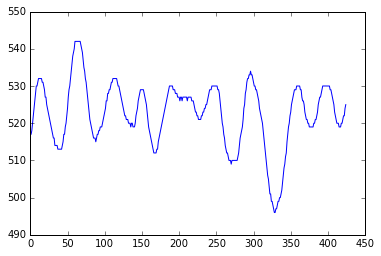

In [98]:
%matplotlib inline

plt.plot(np.array(comm_dict['52-3']['position']['Lsho'])[:,0]) # visualizing the horizontal movement

<a id='legagility'></a>
### B. Leg Agility Task

Load the leg agility task:

In [99]:
trajectory_file = 'LA_split_all_export.txt'

with open(trajectory_file, 'r') as infile:
    la_dict = json.load(infile)

len(la_dict.keys())

132

In [100]:
la_dict.keys()[:5]

[u'217', u'212', u'90', u'93', u'24']

Trials are not separated into segments like for the communication task. However, noise type may need to be stripped from keys (use str.split()). 

In [101]:
la_dict['217'].keys()

[u'position', u'resp', u'idx']

Each entry contains three parts - position and resp (as with communication task) and idx, an index of the frame number.

For the lower limbs, trajectory are split into active ('\_act') and rest ('\_rst'), indicating whether the leg agility task is being performed by that leg.

In [102]:
sorted(la_dict['217']['position'].keys())

[u'Lank_act',
 u'Lank_rst',
 u'Lelb',
 u'Lhip_act',
 u'Lhip_rst',
 u'Lkne_act',
 u'Lkne_rst',
 u'Lsho',
 u'Lwri',
 u'Rank_act',
 u'Rank_rst',
 u'Relb',
 u'Rhip_act',
 u'Rhip_rst',
 u'Rkne_act',
 u'Rkne_rst',
 u'Rsho',
 u'Rwri',
 u'face',
 u'head',
 u'neck']

We can visualize the difference between active and rest by plotting the trajectories.

(380, 500)

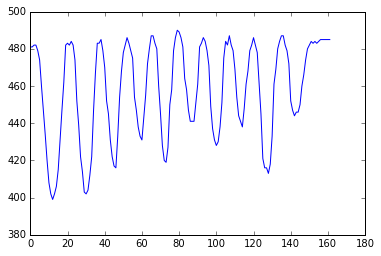

In [103]:
%matplotlib inline

plt.plot(np.array(la_dict['217']['position']['Lank_act'])[:,1]) # visualizing the vertical movement
plt.ylim(380, 500)

(380, 500)

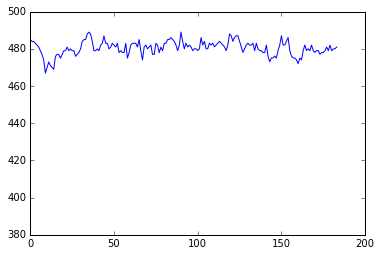

In [104]:
%matplotlib inline

plt.plot(np.array(la_dict['217']['position']['Lank_rst'])[:,1])
plt.ylim(380, 500)

There is a greater amplitude of movement in the active compared to the rest, as expected.

<a id='toetapping'></a>
### C. Toe Tapping Task

Load the toe tapping task:

In [105]:
trajectory_file = 'TT_opt_flow_export.txt'

with open(trajectory_file, 'r') as infile:
    tt_dict = json.load(infile)

len(tt_dict.keys())

133

In [106]:
tt_dict.keys()[:5]

[u'217', u'212', u'228', u'21 (shake)', u'226']

In [107]:
tt_dict['217'].keys()

[u'Lank', u'Rank']

There are two flows available, for the left foot and right foot. Flow bounding boxes were based on left and right ankle locations from CPM. Flows have already been normalized by head distance. 

There are three signals provided for each flow:

[0] Total optical flow (norm of X and Y flows)  
[1] Total X flow (horizontal)  
[2] Total Y flow (vertical)

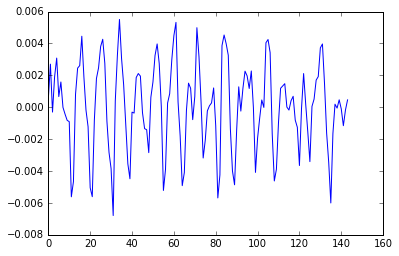

In [108]:
%matplotlib inline

plt.plot(tt_dict['217']['Lank'][1])

<a id='Ratings'></a>
## 2. Ratings

<a id='UDysRS'></a>
### A. UDysRS

In [109]:
rating_file = 'UDysRS.txt'

with open(rating_file, 'r') as infile:
    ratings = json.load(infile)

ratings.keys()

[u'Communication', u'Drinking', u'Higher']

In [110]:
len(ratings['Communication'].keys())

147

In [111]:
ratings['Communication'].keys()[:10]

[u'217', u'214', u'215', u'212', u'226', u'225', u'24', u'25', u'26', u'27']

There are three parts available in this UDysRS rating - ratings for the communication task, the drinking task, and the highest rating across all tasks that were used. Note that the ambulation task was also used to calculate the 'Higher' score, but is not included as trajectories were not extracted for this task. Ratings are indexed by trial number.

Within each rating is the subscores:

In [112]:
ratings['Communication']['215']

[2, 1, 1, 0, 0, 0]

There are 6 subscores available for UDysRS. Subscore indices are:

[0] Neck  
[1] Right arm/shoulder  
[2] Left arm/shoulder  
[3] Trunk  
[4] Right leg/hip  
[5] Left leg/hip  

Note that while the facial dyskinesia score is usually part of UDysRS, we did not analyze facial dyskinesia for this study.

<a id='UPDRS'></a>
### B. UPDRS

For the UPDRS, the rating keys correspond to the item number in the MDS-UPDRS. For items where there are two ratings, the first rating is the right side and the second is the left. For item 3.17 (rest tremor amplitude), the items in order are right upper extremity, left upper extremity, right lower extremity, left lower extremity, and lip/jaw. The total score is also included.

In [113]:
rating_file = 'UPDRS.txt'

with open(rating_file, 'r') as infile:
    ratings = json.load(infile)

sorted(ratings.keys())

[u'3.1',
 u'3.10',
 u'3.11',
 u'3.12',
 u'3.13',
 u'3.14',
 u'3.15',
 u'3.16',
 u'3.17',
 u'3.18',
 u'3.2',
 u'3.4',
 u'3.5',
 u'3.6',
 u'3.7',
 u'3.8',
 u'3.9',
 u'Total']

<a id='CAPSIT'></a>
### C. CAPSIT

For the CAPSIT, rating keys also correspond to items from the MDS-UPDRS.

In [114]:
rating_file = 'CAPSIT.txt'

with open(rating_file, 'r') as infile:
    ratings = json.load(infile)

sorted(ratings.keys())

[u'3.1', u'3.10', u'3.4', u'3.5', u'3.6', u'3.8', u'3.9']

In [115]:
ratings['3.10']['214']

[0, 0, 0, 0, 0, 0, 0]

Within each item is 6 subscores, numbered as follows:

[0] Neck  
[1] Trunk  
[2] Upper limb right  
[3] Upper limb left  
[4] Lower limb right  
[5] Lower limb left  

Face has been omitted.

<a id='Subjects'></a>
## 3. Subject Numbers

Subject numbers have also been provided to ensure unbiased cross-validation. Dictionary keys are the trial number and the value is the subject number.

In [116]:
sn_file = 'sn_numbers.txt'

with open(sn_file, 'r') as infile:
    subj_num = json.load(infile)

len(subj_num.keys())

135

In [117]:
subj_num['217']

11

<a id='Demo'></a>
## 4. Example 

Let's look at a sample trajectory, the right shoulder for the communication task, trial 56-2.

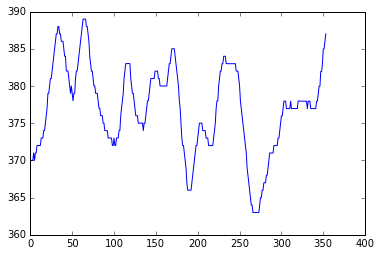

In [118]:
%matplotlib inline

trial_num = '56-2'

plt.plot(np.array(comm_dict[trial_num]['position']['Rsho'])[:,0])

Based on the amount of movement, we would likely expect a non-zero dyskinesia severity score. Let's check the UDysRS.

In [120]:
rating_file = 'UDysRS.txt'

with open(rating_file, 'r') as infile:
    ratings = json.load(infile)

# If using communication task, will have to split the trial num to get the key
# split can also be done using str.split(), but regexp allows split on space or hyphen
import re

trial_key = re.split("\s|-", trial_num)[0]  
ratings['Communication'][trial_key]

[1, 2, 1.5, 1.5, 2, 2]

The right shoulder/arm score for the UDysRS is the 2nd rating, which is 2. We can also check the subject number for this trajectory.

In [71]:
subj_num[trial_key]

6